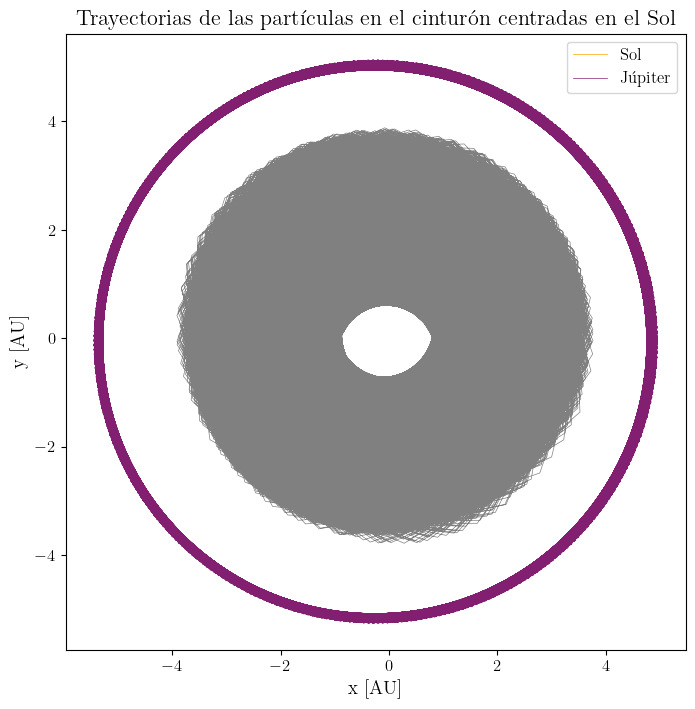

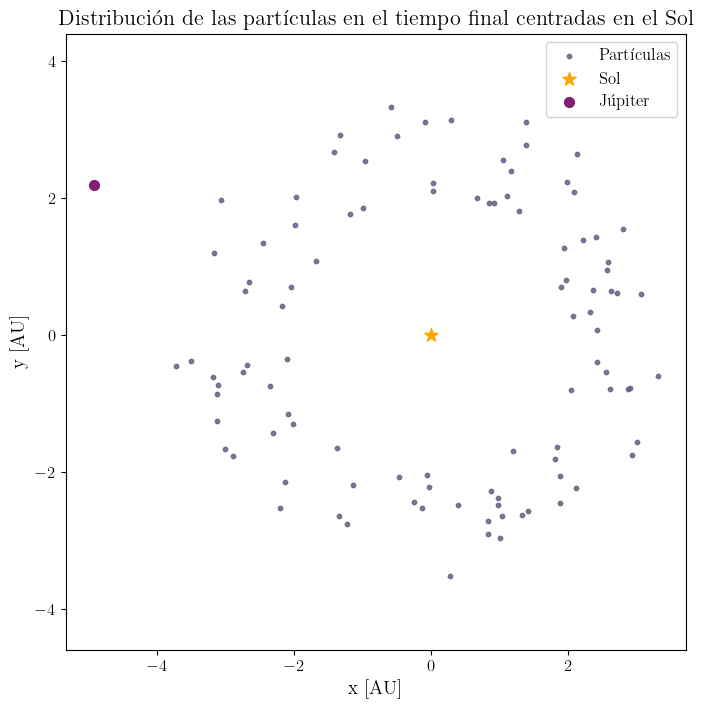

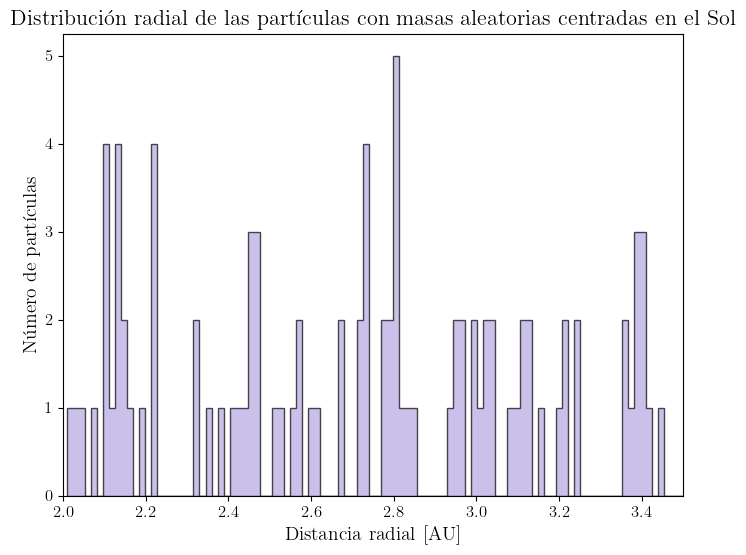

In [21]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": True,
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

#Creamos la simulación bajo el nombre "sim"
sim = rebound.Simulation()
G = 6.67430e-11 #Definimos la constante gravitacional
sim.G = G #Agregamos G a la simulación
mass_sun = 1.989e30 #Definimos la masa del sol en kg
sim.add(m=mass_sun) #Agregamos el sol a la simulación, con la masa definida anteriormente

#Ahora, añadimos Júpiter a la simulación, multiplicando por la masa solar (ya definida)
mass_jupiter = 1e-3 * mass_sun 
a_jupiter = 5.2 * 1.496e11  # Definimos el semieje mayor en metros
e_jupiter = 0.0489 #Definimos la excentricidad
inc_jupiter = 0.0227  # Definimos la inclinación (radianes)
Omega_jupiter = np.radians(100.464)  #longitud del nodo ascendente  (radianes)
omega_jupiter = np.radians(273.867)  #argumento del periastro en (radianes)
f_jupiter = np.radians(0)  #anomalía verdadera en radianes

sim.add(a=a_jupiter, e=e_jupiter, inc=inc_jupiter, Omega=Omega_jupiter, omega=omega_jupiter, f=f_jupiter, m=mass_jupiter)

#Partícular aleatorias
Nparticles = 100
au = 1.496e11
rin = 2
rout = 3.5
a_cinturon = np.linspace(rin, rout, Nparticles)

# Definir el rango de masas razonable en kilogramos
min_mass = 1e10  # 10^10 kg
max_mass = 1e21  # 10^21 kg

# Generar masas aleatorias dentro del rango definido
random_masses = np.random.uniform(min_mass, max_mass, Nparticles)

# Añadir partículas con masas aleatorias
for a, m in zip(a_cinturon, random_masses):
    e = np.random.uniform(0, 0.1)
    inc = np.random.uniform(0, 0.05)
    Omega = np.random.uniform(0, 2 * np.pi)
    omega = np.random.uniform(0, 2 * np.pi)
    f = np.random.uniform(0, 2 * np.pi)
    sim.add(a=a*au, e=e, inc=inc, Omega=Omega, omega=omega, f=f, m=m)

# Configurar tiempo de integración
years = 1000
days_per_year = 365.25
hours_per_day = 24
seconds_per_hour = 3600
integration_time = years * days_per_year * hours_per_day * seconds_per_hour
orbit_period_2au = 2 * np.pi * np.sqrt((2 * au)**3 / (G * mass_sun))
sim.dt = orbit_period_2au * 1e-2

# Configurar para almacenar las trayectorias
times = np.linspace(0, integration_time, 1000)
x_positions = np.zeros((len(times), Nparticles + 2))  # Ajuste aquí: +2 en lugar de +1
y_positions = np.zeros((len(times), Nparticles + 2))  # Ajuste aquí: +2 en lugar de +1

for i, time in enumerate(times):
    sim.integrate(time)
    sun = sim.particles[0]
    for j, p in enumerate(sim.particles):
        x_positions[i, j] = p.x - sun.x
        y_positions[i, j] = p.y - sun.y

# Graficar las trayectorias
plt.figure(figsize=(8, 8))
plt.plot(x_positions[:, 0]/au, y_positions[:, 0]/au, lw=0.5, label='Sol', color='orange')
plt.plot(x_positions[:, 1]/au, y_positions[:, 1]/au, lw=0.5, label='Júpiter', color='#831F70')
for j in range(2, Nparticles + 2):
    plt.plot(x_positions[:, j]/au, y_positions[:, j]/au, lw=0.5, color='gray')

plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.title(r'Trayectorias de las partículas en el cinturón centradas en el Sol')
plt.axis(r'equal')
plt.legend()
plt.savefig('0.jpg')
plt.show()

# Graficar la distribución de las partículas en el tiempo final
plt.figure(figsize=(8, 8))
plt.scatter(x_positions[-1, 2:]/au, y_positions[-1, 2:]/au, s=10, color='#62597B', label='Partículas', alpha=0.8)
plt.scatter(x_positions[-1, 0]/au, y_positions[-1, 0]/au, s=100, color='orange',marker='*', label='Sol')
plt.scatter(x_positions[-1, 1]/au, y_positions[-1, 1]/au, s=50, color='#831F70', label='Júpiter')
plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.title(r'Distribución de las partículas en el tiempo final centradas en el Sol')
plt.axis(r'equal')
plt.legend()
plt.grid(False)
plt.savefig('1.jpg')
plt.show()

# Configurar para almacenar las distancias radiales finales
radii = []

# Integrar hasta el tiempo final y almacenar las distancias radiales finales
sim.integrate(integration_time)
sun = sim.particles[0]
for p in sim.particles[2:]:  # Excluir Sol y Júpiter
    r = np.sqrt((p.x - sun.x)**2 + (p.y - sun.y)**2 + (p.z - sun.z)**2)
    radii.append(r)

# Convertir a unidades astronómicas
radii = np.array(radii) / au

# Crear el histograma de la distribución radial
plt.figure(figsize=(8, 6), )
plt.hist(radii, bins=120, histtype='stepfilled',color='#B5A6E2', edgecolor='black', alpha=0.7)
plt.xlabel(r'Distancia radial [AU]')
plt.ylabel(r'Número de partículas')
plt.title(r'Distribución radial de las partículas con masas aleatorias centradas en el Sol')
plt.xlim(2,3.5)
plt.grid(False)
plt.savefig('2.jpg')
plt.show()

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": True,
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# Configuración de la simulación
sim = rebound.Simulation()
G = 6.67430e-11
sim.G = G
mass_sun = 1.989e30
sim.add(m=mass_sun)

# Añadir Júpiter
mass_jupiter = 1e-3 * mass_sun
a_jupiter = 5.2 * 1.496e11  # Semieje mayor en metros
e_jupiter = 0.0489
inc_jupiter = 0.0227  # Inclinación en radianes
Omega_jupiter = np.radians(100.464)  # Longitud del nodo ascendente en radianes
omega_jupiter = np.radians(273.867)  # Argumento del periastro en radianes
f_jupiter = np.radians(0)  # Anomalía verdadera en radianes

sim.add(a=a_jupiter, e=e_jupiter, inc=inc_jupiter, Omega=Omega_jupiter, omega=omega_jupiter, f=f_jupiter, m=mass_jupiter)

# Añadir Marte
mass_mars = 3.227e-7 * mass_sun
a_mars = 1.524 * 1.496e11  # Semieje mayor en metros
e_mars = 0.0934
inc_mars = np.radians(1.850)  # Inclinación en radianes
Omega_mars = np.radians(49.558)  # Longitud del nodo ascendente en radianes
omega_mars = np.radians(286.502)  # Argumento del periastro en radianes
f_mars = np.radians(0)  # Anomalía verdadera en radianes

sim.add(a=a_mars, e=e_mars, inc=inc_mars, Omega=Omega_mars, omega=omega_mars, f=f_mars, m=mass_mars)

# Añadir Saturno
mass_saturn = 2.858e-4 * mass_sun
a_saturn = 9.58 * 1.496e11  # Semieje mayor en metros
e_saturn = 0.0565
inc_saturn = np.radians(2.485)  # Inclinación en radianes
Omega_saturn = np.radians(113.665)  # Longitud del nodo ascendente en radianes
omega_saturn = np.radians(339.392)  # Argumento del periastro en radianes
f_saturn = np.radians(0)  # Anomalía verdadera en radianes

sim.add(a=a_saturn, e=e_saturn, inc=inc_saturn, Omega=Omega_saturn, omega=omega_mars, f=f_mars, m=mass_saturn)

# Añadir partículas con masas aleatorias
Nparticles = 250
au = 1.496e11
rin = 2
rout = 3.5
a_cinturon = np.linspace(rin, rout, Nparticles)
au = 1.496e11

# Definir el rango de masas razonable en kilogramos
min_mass = 1e10  # 10^10 kg
max_mass = 1e21  # 10^21 kg

# Generar masas aleatorias dentro del rango definido
random_masses = np.random.uniform(min_mass, max_mass, Nparticles)

# Añadir partículas con masas aleatorias
for a, m in zip(a_cinturon, random_masses):
    e = np.random.uniform(0, 0.1)
    inc = np.random.uniform(0, 0.05)
    Omega = np.random.uniform(0, 2 * np.pi)
    omega = np.random.uniform(0, 2 * np.pi)
    f = np.random.uniform(0, 2 * np.pi)
    sim.add(a=a*au, e=e, inc=inc, Omega=Omega, omega=omega, f=f, m=m)

# Configurar tiempo de integración
years = 1000
days_per_year = 365.25
hours_per_day = 24
seconds_per_hour = 3600
integration_time = years * days_per_year * hours_per_day * seconds_per_hour
orbit_period_2au = 2 * np.pi * np.sqrt((2 * au)**3 / (G * mass_sun))
sim.dt = orbit_period_2au * 1e-2

# Configurar para almacenar las trayectorias
times = np.linspace(0, integration_time, 1000)
x_positions = np.zeros((len(times), Nparticles + 4))  # el 4 es para incluir el Sol, Júpiter, Marte y Saturno
y_positions = np.zeros((len(times), Nparticles + 4))  # el 4 es para incluir el Sol, Júpiter, Marte y Saturno

for i, time in enumerate(times):
    sim.integrate(time)
    sun = sim.particles[0]
    for j, p in enumerate(sim.particles):
        x_positions[i, j] = p.x - sun.x
        y_positions[i, j] = p.y - sun.y

# Graficar las trayectorias
plt.figure(figsize=(8, 8))
plt.plot(x_positions[:, 0]/au, y_positions[:, 0]/au, lw=0.5, label='Sol', color='orange')
plt.plot(x_positions[:, 1]/au, y_positions[:, 1]/au, lw=0.5, label='Júpiter', color='red')
plt.plot(x_positions[:, 2]/au, y_positions[:, 2]/au, lw=0.5, label='Marte', color='blue')
plt.plot(x_positions[:, 3]/au, y_positions[:, 3]/au, lw=0.5, label='Saturno', color='green')
for j in range(4, Nparticles + 4):
    plt.plot(x_positions[:, j]/au, y_positions[:, j]/au, lw=0.5, color='#BAB7CE')

plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.title(r'Trayectorias de las partículas en el cinturón centradas en el Sol')
plt.axis(r'equal')
plt.legend()
plt.savefig('3.jpg')
plt.show()

# Graficar la distribución de las partículas en el tiempo final
plt.figure(figsize=(8, 8))
plt.scatter(x_positions[-1, 4:]/au, y_positions[-1, 4:]/au, s=10, color='grey', label='Partículas', alpha=0.7)
plt.scatter(x_positions[-1, 0]/au, y_positions[-1, 0]/au, s=100, color='orange', marker='*', label='Sol')
plt.scatter(x_positions[-1, 1]/au, y_positions[-1, 1]/au, s=50, color='red', label='Júpiter')
plt.scatter(x_positions[-1, 2]/au, y_positions[-1, 2]/au, s=30, color='blue', label='Marte')
plt.scatter(x_positions[-1, 3]/au, y_positions[-1, 3]/au, s=70, color='green', label='Saturno')
plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.title(r'Distribución de las partículas en el tiempo final centradas en el Sol')
plt.axis(r'equal')
plt.legend()
plt.grid(False)
plt.savefig('4.jpg')
plt.show()

# Configurar para almacenar las distancias radiales finales
radii = []

# Integrar hasta el tiempo final y almacenar las distancias radiales finales
sim.integrate(integration_time)
sun = sim.particles[0]
for p in sim.particles[4:]:  # Excluir Sol, Júpiter, Marte y Saturno
    r = np.sqrt((p.x - sun.x)**2 + (p.y - sun.y)**2 + (p.z - sun.z)**2)
    radii.append(r)

# Convertir a unidades astronómicas
radii = np.array(radii) / au

# Crear el histograma de la distribución radial
plt.figure(figsize=(8, 6))
#plt.hist(radii, bins=120, edgecolor='k', histtype='step',alpha=0.7)
plt.hist(radii, bins=500, histtype='stepfilled',color='purple', edgecolor='purple', alpha=0.7)
plt.xlabel(r'Distancia radial [AU]')
plt.ylabel(r'Número de partículas')
plt.title(r'Distribución radial de las partículas con masas aleatorias centradas en el Sol')
plt.grid(False)
plt.savefig('6con500bins.jpg')
plt.show()